In [1]:
from datasets import Preprocessor_2p5D
from plotting.plotting import make_seg_img
from load_config import load_config
from evaluator import Evaluator
from utils import model_from_config

In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np

config = load_config()

In [3]:
net = model_from_config(config)
evaluator = Evaluator(config, net, 'cuda')

In [4]:
scores = evaluator.evaluate_checkpoint(
    75300, 
    apply_postprocess=True,
    which_split='test'
)
scores

Total slices = 437
Processed slices = 433
idx=21 dice_score={'empty': 0.9989423751831055, 'liver': 0.9570990204811096, 'cancer': 0.22575829923152924}
Total slices = 683
Processed slices = 679
idx=101 dice_score={'empty': 0.9985873699188232, 'liver': 0.964382529258728, 'cancer': 0.7117196917533875}
Total slices = 766
Processed slices = 762
idx=89 dice_score={'empty': 0.9992789030075073, 'liver': 0.9624654054641724, 'cancer': 0.0}
Total slices = 668
Processed slices = 664
idx=26 dice_score={'empty': 0.9995145797729492, 'liver': 0.9613798260688782, 'cancer': 0.7029107213020325}
Total slices = 407
Processed slices = 403
idx=124 dice_score={'empty': 0.9994677305221558, 'liver': 0.9552655220031738, 'cancer': 0.8340393304824829}
Total slices = 111
Processed slices = 107
idx=36 dice_score={'empty': 0.9973276257514954, 'liver': 0.9487125277519226, 'cancer': 0.2231103777885437}
Total slices = 401
Processed slices = 397
idx=126 dice_score={'empty': 0.999290406703949, 'liver': 0.9736304879188538, 

{21: {'empty': 0.9989423751831055,
  'liver': 0.9570990204811096,
  'cancer': 0.22575829923152924},
 101: {'empty': 0.9985873699188232,
  'liver': 0.964382529258728,
  'cancer': 0.7117196917533875},
 89: {'empty': 0.9992789030075073, 'liver': 0.9624654054641724, 'cancer': 0.0},
 26: {'empty': 0.9995145797729492,
  'liver': 0.9613798260688782,
  'cancer': 0.7029107213020325},
 124: {'empty': 0.9994677305221558,
  'liver': 0.9552655220031738,
  'cancer': 0.8340393304824829},
 36: {'empty': 0.9973276257514954,
  'liver': 0.9487125277519226,
  'cancer': 0.2231103777885437},
 126: {'empty': 0.999290406703949,
  'liver': 0.9736304879188538,
  'cancer': 0.38758471608161926},
 30: {'empty': 0.9975970387458801,
  'liver': 0.9413906931877136,
  'cancer': 0.12919896841049194},
 108: {'empty': 0.9985455870628357,
  'liver': 0.8792491555213928,
  'cancer': 0.7261678576469421},
 72: {'empty': 0.9977043867111206,
  'liver': 0.9535272121429443,
  'cancer': 0.759274423122406},
 43: {'empty': 0.97332650

In [5]:
import json
with open('best_model_test_scores.json', 'w') as f:
    json.dump(scores, f)

In [6]:
table = []
for scan_idx in scores.keys():
    for cat in ('liver', 'cancer'):
        proc_score = scores[scan_idx][cat]
        
        table.append((int(scan_idx), cat, proc_score))

In [7]:
import pandas as pd

df = pd.DataFrame(table, columns=('scan_idx', 'category', 'score'))
df

,scan_idx,category,score
0,21,liver,0.957099
1,21,cancer,0.225758
2,101,liver,0.964383
3,101,cancer,0.711720
4,89,liver,0.962465
5,89,cancer,0.000000
6,26,liver,0.961380
7,26,cancer,0.702911
8,124,liver,0.955266
9,124,cancer,0.834039


<AxesSubplot: xlabel='score', ylabel='category'>

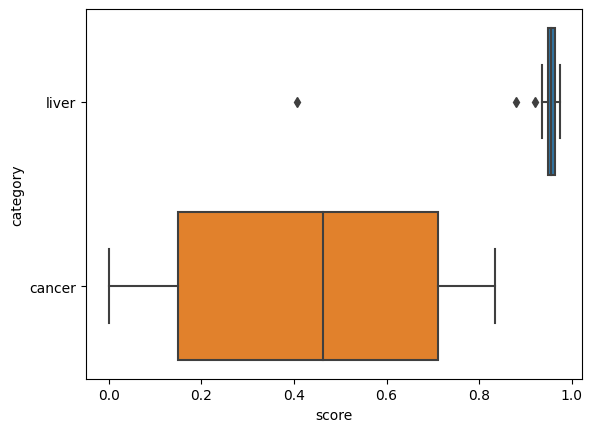

In [8]:
import seaborn as sns
sns.boxplot(data=df, x="score", y="category")

In [10]:
df.query('category == "cancer"')['score'].mean()

0.43685699218795415

In [11]:

df.query('category == "liver"')['score'].mean()

0.9253291814100175